In [23]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Load the cleaned & encoded dataset saved in o/p
ce_data = pd.read_csv('../outputs/airbnb_cleaned_encoded.csv')


In [24]:
#Remvoing target variable from dataset 
X = ce_data.drop('price', axis=1)
y = ce_data['price']

#TrainTestSplit Training & Testing purpose test_size = 0.2 & randomstate = 42
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [25]:
#1. Model  (Linear Regression) & Eval
print("📈 Linear Regression:")

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Model Evaluation MSE, MAE, R square metrices
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R²: {r2_lr:.4f}") # ~58% R2 


📈 Linear Regression:
RMSE: 61.48
MAE: 38.28
R²: 0.5797


In [26]:
#2. Model (Decision Tree Regressor ) & Eval.
print("\n🌳 Decision Tree Regressor:")

dec_tree = DecisionTreeRegressor(max_depth=5,random_state=42)
dec_tree.fit(X_train, y_train)
y_pred_tree = dec_tree.predict(X_test)

from sklearn.model_selection import cross_val_score
#Utilizing cross-validation to improve model overall performance

scores = cross_val_score(dec_tree, X, y, scoring='r2', cv=5)
print("Cross-validated R²:", scores.mean())
print(scores)


rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"RMSE: {rmse_tree:.2f}")
print(f"MAE: {mae_tree:.2f}")
print(f"R²: {r2_tree:.4f}") # ~ BAD! Pointing overfitting!




🌳 Decision Tree Regressor:
Cross-validated R²: 0.417660553354896
[0.57176149 0.22788989 0.3326672  0.55968363 0.39630056]
RMSE: 88.83
MAE: 41.43
R²: 0.1225


In [27]:
from sklearn.model_selection import GridSearchCV
#Improving Decision Tree Performance
# Parameter tuning & using grid search cross validation
param_grid = {
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeRegressor(random_state=42)

grid = GridSearchCV(estimator=dt, param_grid=param_grid, 
                    scoring='r2', cv=5, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

# Best Params
print("✅ Best Parameters:", grid.best_params_)
print("✅ Best CV R² Score:", grid.best_score_)

best_tree = grid.best_estimator_
y_pred_best = best_tree.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("📈 Tuned Decision Tree:")
print(f"RMSE: {rmse_best:.2f}")
print(f"MAE: {mae_best:.2f}")
print(f"R²: {r2_best:.4f}") #Notable improvement in performance 
# ~R2 58%

Fitting 5 folds for each of 45 candidates, totalling 225 fits


✅ Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
✅ Best CV R² Score: 0.48858412211062757
📈 Tuned Decision Tree:
RMSE: 61.19
MAE: 37.22
R²: 0.5836


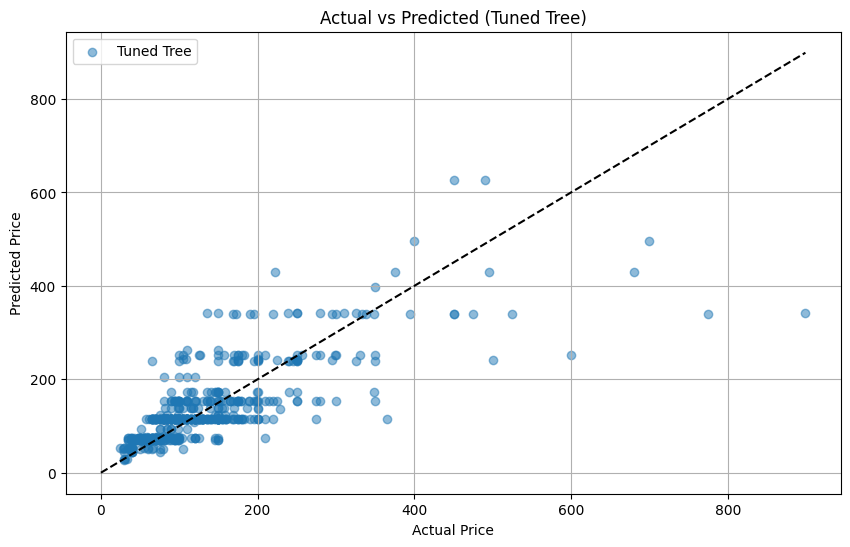

In [28]:
#Plotted Actual vs Predicted Chart between Test & Best Predicted Estimator Prediction
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_best, alpha=0.5, label='Tuned Tree')
plt.plot([0, max(y_test)], [0, max(y_test)], 'k--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Tuned Tree)')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
#Saved Model Results & Performance 
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'RMSE': [rmse_lr,rmse_tree],
    'MAE': [mae_lr,mae_tree ],
    'R2': [r2_lr,r2_tree]
})

results.loc[len(results.index)] = ['Tuned Decision Tree', rmse_best, mae_best, r2_best]
results.to_csv('../outputs/model_comparisons_lr_tree.csv', index=False)
results

,Model,RMSE,MAE,R2
0,Linear Regression,61.475510,38.279192,0.579709
1,Decision Tree,88.830095,41.428132,0.122461
2,Tuned Decision Tree,61.191259,37.223427,0.583587
